Notre projet est décomposé en 4 parties :

- <b>L'Exploration</b>, le Nettoyage (Exploratory Data Analysis (EDA))
- <b>La Normalisation du Texte</b>, Text Processing
- <b>La Création de features</b>
- <b>La Classification</b> du Texte à l'aide du ML

# <font color = Green>Partie 1 : Exploratory Data Analysis</font>

Objectifs :
- Comprendre la forme et la structure de nos données
- Faire un premier netttoyage de nos données
- Avoir une première représentation de nos données
- Repérer des patterns dans nos données

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Librairies</font>

In [1]:
#Librairies classiques
import os, sys, time, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Data :
import pandas as pd
import numpy as np


# NLP :
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup


# Vizualisation :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image #Pillow


# Téléchargement librairie externes:
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")


# Tokenizer & Punctuation
import re
from nltk.tokenize import ToktokTokenizer
from string import punctuation


# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer #pour le bag of word et n-grams
from sklearn.feature_extraction.text import TfidfVectorizer #pour le tf idf


# Train Test
from sklearn.model_selection import train_test_split


# Setup login
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) #set up login
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# Tensorflow, Gensim & Transformer
import gensim
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers
from transformers import *
os.environ["TF_KERAS"]='1'


# Binarizer
from sklearn.preprocessing import MultiLabelBinarizer


# Models
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer


# Confusion Matrix
from sklearn.metrics import confusion_matrix


# Warning ignore
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#Contenu du repertoire
!tree

Folder PATH listing for volume OS
Volume serial number is 6A45-4B07
C:.
+---bert
+---cleaned
�   +---.ipynb_checkpoints
+---source
+---test


### <font color = grey>1.2 Chargement des données</font>

In [3]:
#Chemin de notre fichier source
data = "./source/"
os.listdir(data)

['QueryResults.csv']

In [4]:
#Chargement du Dataframe
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


### <font color = grey>1.3 Filtre / échantillonage</font>

Suite a des contrainte machine et de pertinence des thread, nous ne conservons que les thread ayant plus de 5 de score.
</br>Il s'agit d'un choix arbitraire donc contestable.

In [5]:
df = df[df['Score']>5]

## <font color = purple>2. Premier apperçu des données</font>

### <font color = grey>2.1 Affichage du dataframe</font>

In [6]:
#5 premiers éléments
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


In [7]:
#5 derniers éléments
df.tail(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
27650,ETL in Java Spring Batch vs Apache Spark Bench...,<p>I have been working with Apache Spark + Sca...,<spring><spring-boot><apache-spark><spring-bat...,53689531,20,11914,12,1
27651,Errors installing Composer on macOS (JIT compi...,<p>When I run <code>composer --version</code> ...,<php><macos><composer-php><jit><php-7.3>,53690624,63,34213,18,8
27652,Performant cartesian product (CROSS JOIN) with...,<blockquote>\n <p>The contents of this post w...,<python><pandas><numpy><dataframe><merge>,53699012,68,23298,24,5
27653,What is the spring-boot-configuration-processo...,<h1>Introduction</h1>\n\n<p>So I noticed the f...,<java><spring><maven><spring-boot><gradle>,53707080,59,53974,12,2
27654,Cannot add task 'wrapper' as a task with that ...,<p>When installing <strong>'react-native init ...,<android><reactjs><react-native><wrapper><expo>,53709282,141,97914,19,7


In [8]:
#5 individus au hasard (sample)
df.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
21069,"""Error: No provider for router"" while writing ...",<p>We have done one angular2 project set up an...,<unit-testing><angular><karma-jasmine><angular...,41019109,160,121593,27,3
19804,putting a remote file into hadoop without copy...,<p>I am writing a shell script to put data int...,<unix><ssh><hadoop><copying><piping>,11270509,37,50795,21,5
5560,Adding a parameter to the URL with JavaScript,<p>In a web application that makes use of AJAX...,<javascript><url><parsing><parameters><query-s...,486896,428,882603,117,36
7113,Content pushed down in a UIPageViewController ...,<p><strong>UPDATE 2</strong></p>\n\n<p>I've be...,<ios><objective-c><xcode><uinavigationcontroll...,18202475,60,17867,19,15
20013,java.rmi.ConnectException: Connection refused ...,<pre><code> java.rmi.ConnectException: Conn...,<java><exception><connection><rmi><remoteobject>,15685686,53,242502,18,14


Suite à cette première analyse,
</br>nous remarquons des choses intéréssantes :
- la présence de balises html dans le body
- la présence de mots particulier, C# par exemple ou encore .NET
- la présence des caractères <> pour séparer les tags

### <font color = grey>2.2. Structure</font>

In [9]:
#Taille du dataframe
df.shape

(27655, 8)

In [10]:
#Type de données
df.dtypes

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [11]:
#Information du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27655 entries, 0 to 27654
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27655 non-null  object
 1   Body           27655 non-null  object
 2   Tags           27655 non-null  object
 3   Id             27655 non-null  int64 
 4   Score          27655 non-null  int64 
 5   ViewCount      27655 non-null  int64 
 6   FavoriteCount  27655 non-null  int64 
 7   AnswerCount    27655 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.9+ MB


In [12]:
#Nombre de colonne par type (Utile pour beaucoup de colonne)
df.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [13]:
#nb de valeurs unique par colonne
df.nunique()

Title            27655
Body             27655
Tags             27183
Id               27655
Score             1080
ViewCount        25245
FavoriteCount      589
AnswerCount         77
dtype: int64

Nous avons 27655 individus, nous remarquons donc que :
- Tous les titres sont différents
- Tous les Body sont différents
- Un ID est attribué à chaque individu (clef primaire en SQL)

### <font color = grey>2.3 NaN et valeurs dupliquées</font>

In [14]:
#Nb de Nan par colonne
df.isna().sum().sort_values() 

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [15]:
#Ratio Nan par colonne
df.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [16]:
#Nombre d'individus dupliquée (i.e. toute les colonnes sont égales)
df.duplicated().sum()

0

In [17]:
#Nombre d'individus dupliquée par colonne
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472
col : Id -> duplicated : 0
col : Score -> duplicated : 26575
col : ViewCount -> duplicated : 2410
col : FavoriteCount -> duplicated : 27066
col : AnswerCount -> duplicated : 27578


On remarque qu'il y a <b>472 individus en doublons</b> au niveau des tags.
</br>Cela n'est en rien surpprenant. En effet, avoir 2 individus avec les même tags n'est pas incohérent au contraire.
</br>Néanmoins, il faudra traiter ces balises pour facilité les traitements futurs

In [18]:
#Affichage des lignes dupliquées pour "Tags"
idx = df.duplicated(subset = "Tags", keep = "first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
17511,Add Keypair to existing EC2 instance,<p>I was given <strong>AWS</strong> Console ac...,<amazon-web-services><authentication><ssh><ama...,3260739,266,245353,96,10
25456,How can I modify ripple color when using ?attr...,<p>I've seen some SO questions and they gave s...,<android><android-layout><android-5.0-lollipop...,33061050,127,74243,50,8
23241,Disable multi finger touch in my app,<p>My app uses one Activity to host several fr...,<android><android-layout><android-intent><andr...,12777435,22,26614,13,3
6037,gen already exists but is not a source folder,"<p>I am developing my Android project, After I...",<android><android-layout><android-intent><andr...,9532045,92,57225,22,15
27483,How to add .aar dependency in library module?,<p>I am having one <code>.aar</code> file of o...,<android><android-studio><gradle><android-grad...,34765190,36,30993,11,5
...,...,...,...,...,...,...,...,...
13683,How and/or why is merging in Git better than i...,<p>I've heard in a few places that one of the ...,<svn><git><version-control><mercurial><merge>,2471606,408,68728,267,7
26019,Example of delayed expansion in batch file,<p>Can someone give me an example of where a b...,<windows><batch-file><cmd><environment-variabl...,10558316,54,59855,12,5
27198,Where is the Write-Combining Buffer located? x86,<p>How is the Write-Combine buffer physically ...,<x86><intel><cpu-architecture><cpu-cache><amd-...,49959963,14,5053,12,3
19105,"xmlns, xmlns:xsi, xsi:schemaLocation, and targ...",<p>For the following XML fragment:</p>\n\n<pre...,<xml><xsd><xml-namespaces><xsd-validation><xml...,34202967,73,57493,28,2


### <font color = grey>2.4 Inspection des données</font>

In [19]:
# description des colonnes numériques
df.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,2.765500e+04,27655.000000,2.765500e+04,27655.000000,27655.000000
mean,1.672991e+07,113.756102,1.106085e+05,42.779534,7.140409
std,1.524737e+07,352.306308,2.443554e+05,146.674260,6.784792
min,4.000000e+00,6.000000,2.710000e+02,11.000000,1.000000
25%,4.181782e+06,29.000000,2.157400e+04,14.000000,3.000000
50%,1.200500e+07,51.000000,4.842300e+04,19.000000,5.000000
75%,2.590548e+07,99.000000,1.108880e+05,35.000000,9.000000
max,7.256872e+07,26510.000000,1.008203e+07,11616.000000,127.000000


Ces colonnes ne nous interessent pas.

In [20]:
#description des colonnes texte
df.describe(include = object)

,Title,Body,Tags
count,27655,27655,27655
unique,27655,27655,27183
top,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<java><spring><jpa><spring-data><spring-data-jpa>
freq,1,1,19


Liste des colonnes <font color = green>conservées</font> pour la suite de notre projet :
- <b>Title</b> : Il s'agit de la question / du titre du topic
- <b>Body</b> : Il s'agit du contenu du topic, dans un premier temps nous ne l'utiliserons pas.
- <b>Tags</b> : Il s'agit de la valeur cible (Y)

Liste des colonnes <font color = red>non conservées</font> pour la suite de notre projet :
- <b>Id</b> : nous conservons les index 
- <b>Score</b> / <b>ViewCount</b> / <b>FavoriteCount</b> / <b>AnswerCount</b> : Ces colonnes ne nous sont d'aucune utilité dans la suggestion de Tags

## <font color = Purple>3. Cleaning des Données</font>

### <font color = grey>3.1 Selection des colonnes</font>

In [21]:
cols = ["Title", "Body","Tags"]
df = df[cols]
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


### <font color = grey>3.2. Suppression des Nan</font>

In [22]:
df.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

Pas de Nan ==> pas de suppression. 
</br>sinon, on utilise la fonction dropna()

### <font color = grey>3.3 Gestion des valeurs dupliquées</font>

In [23]:
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472


Pas d'action car les tags dupliquées sont "logique", sinon :

In [24]:
#Drop duplciate :
#df.drop_duplicates(subset = "COLONNE", inplace = True)

----

## <font color = purple>4. Exploration des Données</font>

### <font color = grey>4.1. La cible "Tags"</font>

In [25]:
#supression des <, >
df["Tags"] = df["Tags"].str.replace("><"," ")
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">","")

In [26]:
df["Tags"].head(10)

0                   bash shell variables scope declare
1                     php mysql datetime date timezone
2    javascript node.js ecmascript-6 generator ecma...
3                 c# .net xml wcf configurationmanager
4    c# xml inheritance serialization xml-serializa...
5             mysql database performance innodb myisam
6              python mysql django django-models enums
7       sql database-design tags data-modeling tagging
8            c++ c include header-files c-preprocessor
9                       .net asp.net url uri authority
Name: Tags, dtype: object

In [27]:
df['Tags'] = df['Tags'].apply(lambda x: x.split())

In [28]:
df["Tags"].head(10)

0             [bash, shell, variables, scope, declare]
1               [php, mysql, datetime, date, timezone]
2    [javascript, node.js, ecmascript-6, generator,...
3           [c#, .net, xml, wcf, configurationmanager]
4    [c#, xml, inheritance, serialization, xml-seri...
5       [mysql, database, performance, innodb, myisam]
6        [python, mysql, django, django-models, enums]
7    [sql, database-design, tags, data-modeling, ta...
8      [c++, c, include, header-files, c-preprocessor]
9                 [.net, asp.net, url, uri, authority]
Name: Tags, dtype: object

In [29]:
all_tags = [item for sublist in df['Tags'].values for item in sublist]

In [30]:
#Nombre de Tags :
len(all_tags)

138275

In [31]:
#Nombre de Tags sans doublons :
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

12553

In [32]:
#On ne conserve que les 100 Tags les plus utilisés:
flat_list = [item for sublist in df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [33]:
#Affichage des 100 tags conservés
tags_features

['python',
 'java',
 'javascript',
 'c#',
 'ios',
 'android',
 'c++',
 '.net',
 'iphone',
 'objective-c',
 'html',
 'jquery',
 'php',
 'c',
 'linux',
 'css',
 'node.js',
 'sql',
 'performance',
 'swift',
 'xcode',
 'asp.net',
 'spring',
 'windows',
 'asp.net-mvc',
 'mysql',
 'cocoa-touch',
 'json',
 'algorithm',
 'multithreading',
 'ruby-on-rails',
 'string',
 'database',
 'arrays',
 'macos',
 'git',
 'django',
 'bash',
 'pandas',
 'sql-server',
 'c++11',
 'ruby',
 'image',
 'numpy',
 'python-3.x',
 'wpf',
 'ajax',
 'r',
 'shell',
 'unit-testing',
 'security',
 'reactjs',
 'hibernate',
 'rest',
 'visual-studio',
 'machine-learning',
 'http',
 'angularjs',
 'jpa',
 'postgresql',
 'gcc',
 'google-chrome',
 'dataframe',
 'entity-framework',
 'ipad',
 'eclipse',
 'authentication',
 'unix',
 'file',
 'asynchronous',
 'optimization',
 'xml',
 'list',
 'oop',
 'image-processing',
 'ssl',
 'debugging',
 'spring-boot',
 'cocoa',
 'ubuntu',
 'spring-mvc',
 'class',
 'android-studio',
 'datetime'

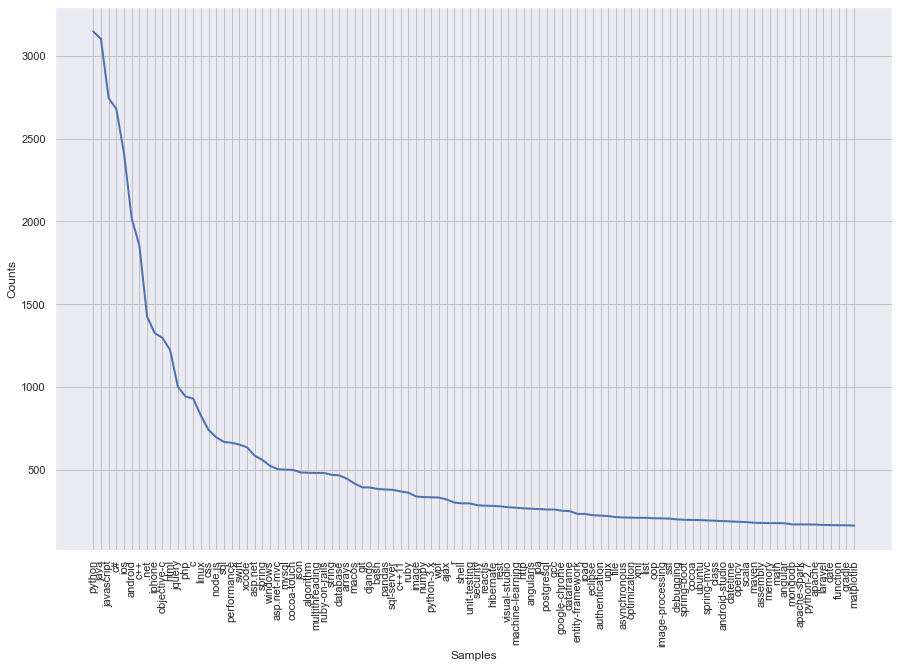

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
#Subplot des 100 tags :
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [35]:
def use_wordcloud(corpus):
    wordcloud = WordCloud(background_color = "white",
                     stopwords = [],
                     max_words = 50).generate(" ".join(corpus))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

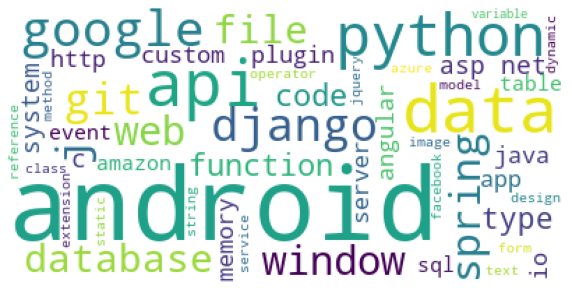

In [36]:
use_wordcloud(keywords)

In [37]:
#Définition d'une fonction d'extraction des 100 tags les plus fréquents d'un corpus
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [38]:
#On applique notre fonction a df["Tags"]
df['Tags'] = df['Tags'].apply(lambda x: most_common(x))

#On remplace les cellule sans tag par des Nan (faciliter le traitement)
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [39]:
df.shape

(27655, 3)

In [40]:
#On supprimme les individu sans Tags
df.dropna(subset=['Tags'], inplace=True)

In [41]:
df.shape

(26081, 3)

In [42]:
print("Nous avons supprimmé " + str(27655 - 26081) + " individus")

Nous avons supprimmé 1574 individus


### <font color = grey>4.2. body</font>

In [43]:
df["Body"].head(10)

0    <p>When typing variables in Bash, what is the ...
1    <p>For those of us who use standard shared hos...
2    <p>I was just reading this fantastic article «...
3    <p>Using C# .NET 3.5 and WCF, I'm trying to wr...
4    <p>Following on from my <a href="https://stack...
5    <p>I'm working on a projects which involves a ...
6    <p>How do I go about specifying and using an E...
7    <p>I've heard of a few ways to implement taggi...
8    <p>What is the difference between using angle ...
9    <p>Is there a simple way in .NET to quickly ge...
Name: Body, dtype: object

In [44]:
#supression des balises html
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [45]:
df["Body"].head(10)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
5    I'm working on a projects which involves a lot...
6    How do I go about specifying and using an ENUM...
7    I've heard of a few ways to implement tagging;...
8    What is the difference between using angle bra...
9    Is there a simple way in .NET to quickly get t...
Name: Body, dtype: object

### <font color = grey>4.3. Title</font>

In [46]:
#Longueur de chaque Document :
df.Title.apply(lambda i : len(i))

0         63
1         64
2         60
3         76
4         37
        ... 
27650     53
27651     60
27652     53
27653    130
27654     65
Name: Title, Length: 26081, dtype: int64

<AxesSubplot:xlabel='Title'>

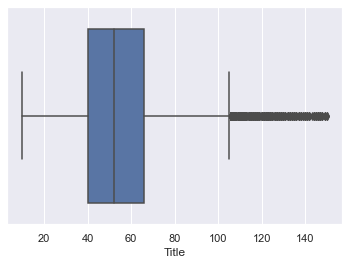

In [47]:
#Affichage avec un boxplot :
tmp = df.Title.str.len()
sns.boxplot(tmp)

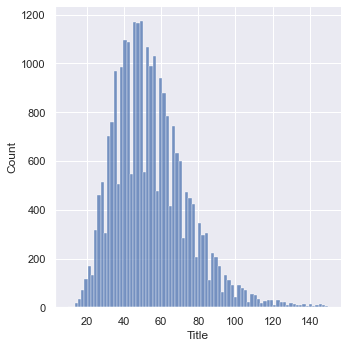

In [48]:
#Affichage sous forme de Displot :
sns.displot(tmp)

In [49]:
#Nous Stockons les infos sur la longueur du titre dans la colonne _len_title :
df["_len_txt"] = tmp

### <font color = grey>4.4. Analyse Multi-variée</font>

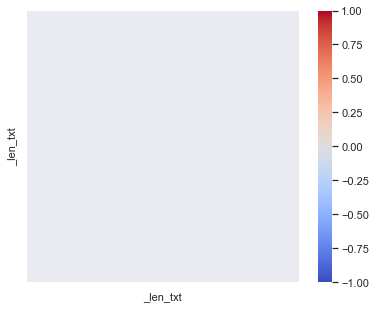

In [50]:
# Matrice de corrélation
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fog, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, fmt = ".2f", square = True)

Non utile dans notre cas car nous n'avons pas de variable Numérique !

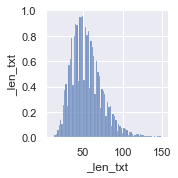

In [51]:
sns.pairplot(df)

Non utile dans notre cas car nous n'avons pas de variable Numérique

In [52]:
#Affichages des 10 plus court titres
df.sort_values("_len_txt").head(5)

,Title,Body,Tags,_len_txt
514,TFS vs SVN,I am about to start a project (.NET) and need ...,[.net],10
3215,.Net Encryption,What I would like to know is the definite appr...,[.net],15
1292,Is assert evil?,The Go language creators write:\n\nGo doesn't ...,"[c++, c]",15
5787,Spring vs Jboss,What are the advantages and disadvantages for ...,[spring],15
14563,Monitor vs lock,When is it appropriate to use either the Monit...,"[c#, .net, multithreading]",15


In [53]:
#Affichages des 10 plus long titre
df.sort_values("_len_txt").tail(5)

,Title,Body,Tags,_len_txt
4344,InvalidArgumentException: Message: invalid arg...,When I am trying to use --user-data-dir for th...,"[python, google-chrome]",149
4687,"XCode getting ""target specifies product type '...","When running my project in XCode, my tests giv...","[ios, objective-c, xcode, unit-testing]",149
19066,MediaSessionCompat:Targeting S+ (version 31 an...,I'm trying to update my application to Android...,"[java, android, android-studio]",149
24888,This app is not authorized to use Firebase Aut...,"Firebase auth was working fine, the debug buil...","[java, android, android-studio]",150
27551,Selenium: WebDriverException:Chrome failed to ...,Recently I switched computers and since then I...,"[python, google-chrome]",150


Nous pouvons nous séparer de la colonne "len_txt" qui a été utile pour l'analyse.

In [54]:
df.drop(columns = "_len_txt", inplace = True)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","[bash, shell]"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"[php, mysql, datetime, date]"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"[javascript, node.js]"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","[c#, .net, xml]"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"[c#, xml]"


In [55]:
#Enregistrement en csv :
df.to_csv("cleaned/df_cleaned.csv", index = False)

### <font color = grey>4.5. Exploration du Corpus et des Documents</font>

Création de la fonction "Print N documents au hasard"

In [56]:
def print_sample(sub_df, n_samp = 10) :
    """Visualisation n_samp documents du Corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows() :
        print("Title :" + ser["Title"])
        print("Tags :", ser["Tags"])
        print("Body :" + ser["Body"] + "..." + "\n\n")

In [57]:
print_sample(df, n_samp = 2)

Title :How does one declare an array of constant function pointers in C?
Tags : ['c', 'arrays']
Body :I need to declare an array of pointers to functions like so:
extern void function1(void);
extern void function2(void);
...

void (*MESSAGE_HANDLERS[])(void) = {
   function1,
   function2,
   ...
};

However, I want the the array to be declared as constant -- both the data in the array and the pointer to the data. Unfortunately, I do not recall where to place the const key-word(s).
I'm assuming the actual pointer, MESSAGE_HANDLERS in this case, is already constant because it is declared as an array. On the otherhand, couldn't the function pointers within the array be change at runtime if it is declared as shown?
...


Title :Print array without brackets and commas
Tags : ['java', 'android', 'arrays', 'list']
Body :I'm porting a Hangman game to Android and have met a few problems. The original Java program used the console, so now I have to somehow beautify the output so that it fits my

# <font color = green>Partie 2 : Text Processing</font>

## <font color = purple>1. Préliminaires</font>

### <font color = grey>1.1. Contexte</font>

L'objectif de cette partie est :
- d'Explorer les principales transformations
- d'Analyser le corpus
- d'effectuer différents transofrmations
- de Réduire la dimensionnalité de nos données (réduction du nb de tokens sur notre corpus)

### <font color = grey>1.2. Chargement des données</font>

In [58]:
# chemin d'accès au fichier :
data = "./cleaned/"
os.listdir(data)

['.ipynb_checkpoints',
 'df_cleaned.csv',
 'df_post_processing.csv',
 'final_df.csv',
 'min_10_words.csv',
 'min_5_words.csv',
 'tokens_body_list.csv',
 'tokens_list.csv',
 'tokens_title_list.csv',
 'unique_words.csv']

In [59]:
# Chargement du dataframe :
fn = data + "df_cleaned.csv"
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","['bash', 'shell']"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"['php', 'mysql', 'datetime', 'date']"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"['javascript', 'node.js']"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","['c#', '.net', 'xml']"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"['c#', 'xml']"


In [60]:
#Taille du dataframe
df.shape

(26081, 3)

In [61]:
#En cas de problème de perf, creation du sample
# df = df.sample(frac = 0.3)

## <font color = purple>2. Text-Processing</font>

### <font color = grey>2.1. RegExp</font>

In [62]:
#Déinition de la fonction clean_text afin de passer des expressions Régulières :
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[0-9]+", "", text) #Remove numeric values
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

### <font color = grey>2.2. Punctuation</font>

In [63]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [66]:
#Permet de n'enlever que la ponctuation "unitaire" , i.e. ne filtre pas les mots comme c#, .net, c++ etc.
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

### <font color = grey>2.3. Lemmatization</font>

In [67]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

### <font color = grey>2.4. Stop Words</font>

In [68]:
def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text) #Essentiel de tokenizer les stop words pour la correspondance
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

### <font color = grey>2.5. Extra Words</font>

In [69]:
def extraWord(text):

    words=token.tokenize(text)

    words_without_extra_words = [w for w in words if w not in extra_words]

    return ' '.join(map(str, words_without_extra_words))

### <font color = grey>2.6. Len Words</font>

In [70]:
def lenWord(text):

    words=token.tokenize(text)

    more_than_N = [w for w in words if len(w) >= min_len_word]

    return ' '.join(map(str, more_than_N))

### <font color = grey>2.7. unique words</font>

In [71]:
def rare_words(text):

    words=token.tokenize(text)

    non_rare_tokens = [w for w in words if w not in List_unique_words]

    return ' '.join(map(str, non_rare_tokens))

## <font color = purple>3. Application des fonctions</font>

### <font color = grey>3.1 Préparation des paramètres</font>

In [72]:
#Tokenizator :
token=ToktokTokenizer()

#Lemmatizer :
lemma=WordNetLemmatizer()

#stop words :
stop_words = set(stopwords.words("english")) #Besoin de télécharger le dictionnaire externe nltk

#extra_words :
extra_words = ["use", "get", "file", "would", "like", "124"]

#min len word >= :
min_len_word = 2


#load the list_unique words (please refer to 2.8.4 to refresh the list)
with open("file.txt", 'r', encoding="utf-8") as f:
    List_unique_words = [line.rstrip('\n') for line in f]

### <font color = grey>3.2 Applications sur Body</font>

In [73]:
df["Body"].head(5)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
Name: Body, dtype: object

In [74]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x))
df['Body'] = df['Body'].apply(lambda x: clean_punct(x))
df['Body'] = df['Body'].apply(lambda x: lemitizeWords(x))
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x))
df['Body'] = df['Body'].apply(lambda x: extraWord(x))
df['Body'] = df['Body'].apply(lambda x: lenWord(x))
df['Body'] = df['Body'].apply(lambda x: rare_words(x))

In [76]:
df["Body"].head(5)

0    type variables bash difference declare inside ...
1    us standard share host package godaddy network...
2    read fantastic article clearly highlight funct...
3    c# .net wcf try write wcf configuration client...
4    follow previous question work object model ser...
Name: Body, dtype: object

### <font color = grey>3.3 Applications sur Title</font>

In [77]:
df["Title"].head(5)

0    Differences between declare, typeset and local...
1    Dealing with PHP server and MySQL server in di...
2    Difference between async/await and ES6 yield w...
3    Loading System.ServiceModel configuration sect...
4                XML Serialization and Inherited Types
Name: Title, dtype: object

In [78]:
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].apply(lambda x: clean_punct(x))
df['Title'] = df['Title'].apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].apply(lambda x: stopWordsRemove(x))
df['Title'] = df['Title'].apply(lambda x: extraWord(x))
df['Title'] = df['Title'].apply(lambda x: lenWord(x))
df['Title'] = df['Title'].apply(lambda x: rare_words(x))

In [79]:
df["Title"].head(5)

0             differences declare local variable bash
1    deal php server mysql server different time zone
2           difference asyncawait es yield generators
3     load configuration section configurationmanager
4                      xml serialization inherit type
Name: Title, dtype: object

### <font color = grey>3.4 Création list unique words (A ne lancer qu'une fois pour obtenir la liste ou pour la refresh)</font>

In [80]:
"""#concaténate words
raw_corpus_title = "".join(df.Title.values)
raw_corpus_body = "".join(df.Body.values)

#Tokenize
title_tokens=token.tokenize(raw_corpus_title)
body_tokens=token.tokenize(raw_corpus_body)

#Calcul frequency
title_freq = pd.Series(title_tokens).value_counts()
body_freq = pd.Series(body_tokens).value_counts()

#filter on unique words
list_unique_words_title = title_freq[title_freq == 1]
list_unique_words_body = body_freq[body_freq == 1]

#list creation
list_title = list_unique_words_title.index.tolist()
list_body = list_unique_words_body.index.tolist()

#list concatenation
List_unique_words = list_title + list_body

#remove duplicates
List_unique_words = list(dict.fromkeys(List_unique_words))

#save to txt
with open("file.txt", "w", encoding="utf-8") as f:
    for s in List_unique_words:
        f.write(str(s) +"\n")"""


'#concaténate words\nraw_corpus_title = "".join(df.Title.values)\nraw_corpus_body = "".join(df.Body.values)\n\n#Tokenize\ntitle_tokens=token.tokenize(raw_corpus_title)\nbody_tokens=token.tokenize(raw_corpus_body)\n\n#Calcul frequency\ntitle_freq = pd.Series(title_tokens).value_counts()\nbody_freq = pd.Series(body_tokens).value_counts()\n\n#filter on unique words\nlist_unique_words_title = title_freq[title_freq == 1]\nlist_unique_words_body = body_freq[body_freq == 1]\n\n#list creation\nlist_title = list_unique_words_title.index.tolist()\nlist_body = list_unique_words_body.index.tolist()\n\n#list concatenation\nList_unique_words = list_title + list_body\n\n#remove duplicates\nList_unique_words = list(dict.fromkeys(List_unique_words))\n\n#save to txt\nwith open("file.txt", "w", encoding="utf-8") as f:\n    for s in List_unique_words:\n        f.write(str(s) +"\n")'

### <font color = grey>3.5 Visualisation</font>

In [81]:
def plot_20_most_frequent_tokens(columns):
    raw_corpus = "".join(columns.values)
    words=token.tokenize(raw_corpus)
    use_wordcloud(words)
    frequency = pd.Series(words).value_counts()
    plt.figure(figsize=(10,6))
    barplot = sns.barplot(x=frequency.head(20).values, y=frequency.head(20).index)
    

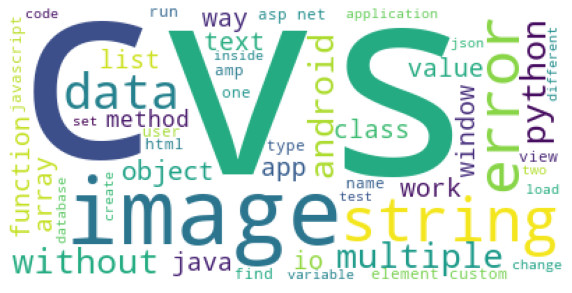

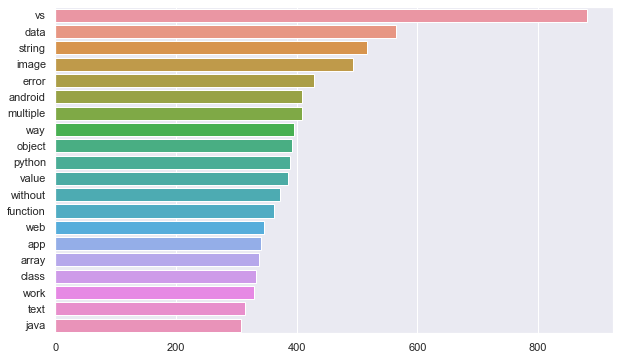

In [82]:
plot_20_most_frequent_tokens(df["Title"])

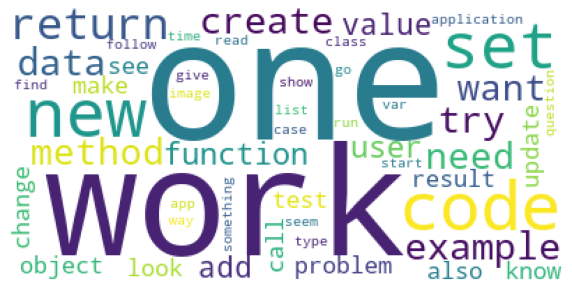

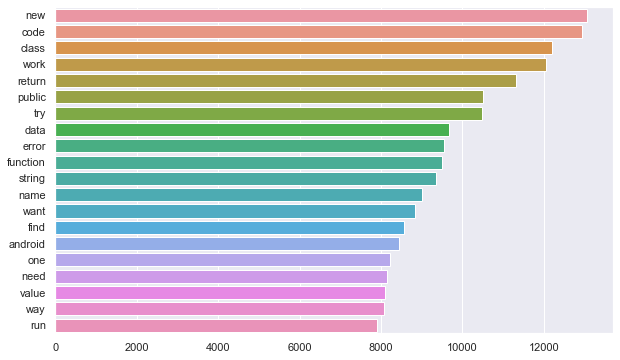

In [83]:
plot_20_most_frequent_tokens(df["Body"])

### <font color = grey>3.6 delete Nan & Save results as CSV</font>

In [84]:
#display Nan
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Title,Body,Tags


In [85]:
#delete nan
df = df.dropna()

In [86]:
df.to_csv("cleaned/df_post_processing.csv", index = False)

# <font color = green>Partie 3 : Features Extraction</font>

## <font color = purple>1. Chargement des données</font>

In [87]:
#load csv
data = "cleaned/"
os.listdir(data)
fn = data + 'df_post_processing.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,differences declare local variable bash,type variables bash difference declare inside ...,"['bash', 'shell']"
1,deal php server mysql server different time zone,us standard share host package godaddy network...,"['php', 'mysql', 'datetime', 'date']"
2,difference asyncawait es yield generators,read fantastic article clearly highlight funct...,"['javascript', 'node.js']"
3,load configuration section configurationmanager,c# .net wcf try write wcf configuration client...,"['c#', '.net', 'xml']"
4,xml serialization inherit type,follow previous question work object model ser...,"['c#', 'xml']"


In [88]:
#create titel + body column
df["title_body"] = df["Title"]+" "+df["Body"]

#Dropna
df = df.dropna()

In [90]:
df = df.dropna()

## <font color = purple>2. Bag of words & Bigrams</font>

In [91]:
#Bag of Words
#Initialize
CountVec = CountVectorizer(ngram_range=(1,1),
                                       analyzer = 'word', #AJOUTER LES COMMENTAIRES !
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

#transform
X_bow = CountVec.fit_transform(df["title_body"])

#create dataframe
df_X_bow=pd.DataFrame(X_bow.toarray(),columns=CountVec.get_feature_names_out())

In [92]:
df_X_bow.head(5)

,.net,able,accept,access,accord,account,achieve,across,action,active,...,write,wrong,xcode,xml,xmlns,xmm,yes,yet,ymm,zip
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,4,0,0,0,1,0,0


In [93]:
#Avec les bigram
#Initialize
CountVec = CountVectorizer(ngram_range=(2,2),
                                       analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000) # to use bigrams ngram_range=(2,2)

#transform
X_bigram = CountVec.fit_transform(df["title_body"])

#create dataframe
df_X_bigram=pd.DataFrame(X_bigram.toarray(),columns=CountVec.get_feature_names_out())

In [94]:
df_X_bigram.head(5)

,.net core,.net framework,able find,abstract class,accept answer,access token,action android,action bar,activation lu,activity android,...,work without,wrapcontent android,write code,xml version,xmlns android,xmlns xsi,xmm xmm,xsi httpwwwworgxmlschemainstance,yes check,ymm ymm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = purple>3. TF-IDF</font>

In [95]:
tfidf = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [96]:
X_tfidf = tfidf.fit_transform(df["title_body"])

In [97]:
#create dataframe
df_X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())

In [98]:
df_X_tfidf.head(10)

,.net,able,accept,access,accord,account,achieve,across,action,active,...,write,wrong,xcode,xml,xmlns,xmm,yes,yet,ymm,zip
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.162019,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.118750,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.169047,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.125322,0.0,0.0,...,0.000000,0.0,0.0,0.480844,0.0,0.0,0.0,0.116814,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.193065,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.304295,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


## <font color = purple>4. Word2Vec Embending</font>

In [99]:
# Paramètre et création d'une liste de phrase
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df["title_body"].astype(str).to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [8]:
# Création et entraînement du modèle Word2Vec
print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

2022-10-27 14:16:54,605 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2022-10-27T14:16:54.605371', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}
2022-10-27 14:16:54,606 : INFO : collecting all words and their counts
2022-10-27 14:16:54,606 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-27 14:16:54,723 : INFO : PROGRESS: at sentence #10000, processed 810692 words, keeping 31229 word types


Build & train Word2Vec model ...


2022-10-27 14:16:54,834 : INFO : PROGRESS: at sentence #20000, processed 1640955 words, keeping 46010 word types
2022-10-27 14:16:54,911 : INFO : collected 53306 word types from a corpus of 2190512 raw words and 26081 sentences
2022-10-27 14:16:54,911 : INFO : Creating a fresh vocabulary
2022-10-27 14:16:55,051 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 53306 unique words (100.0%% of original 53306, drops 0)', 'datetime': '2022-10-27T14:16:55.051366', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
2022-10-27 14:16:55,052 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 2190512 word corpus (100.0%% of original 2190512, drops 0)', 'datetime': '2022-10-27T14:16:55.052369', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'pre

Vocabulary size: 53306
Word2Vec trained


In [42]:
#Observer le vecteur de "python"
w2v_model.wv["python"]

array([-0.5249185 ,  0.6646561 , -0.82922906, -1.5030286 ,  0.08409953,
        0.6417964 ,  1.1198978 ,  0.6281404 , -0.15882988,  3.016652  ,
        0.09301871, -0.6731193 ,  0.25951403, -0.6070298 , -0.80522853,
       -0.5686121 ,  0.9417102 , -0.44339418,  0.5170378 ,  0.03258476,
        1.9991682 ,  1.2408972 , -0.08811932,  0.4486331 ,  0.01876336,
        0.95561814, -0.5955423 ,  0.14500886, -0.7156009 ,  0.67760724,
        0.06483724,  0.8927293 ,  1.1553341 , -1.2964176 , -0.07717817,
        1.8800899 ,  1.4763478 , -1.6057712 , -3.0503886 , -1.8684916 ,
        1.8015702 , -0.46790946,  0.70739996,  0.87580013,  1.7096127 ,
        1.178238  , -1.3548498 , -0.5586399 , -1.2144763 ,  2.1901462 ,
       -0.9706622 ,  0.9127067 , -0.58750904,  0.5642023 , -1.2340472 ,
        2.9138083 ,  0.88751024, -0.09670794, -1.5080348 , -0.02133594,
        0.7924175 , -1.2539058 , -1.1890563 , -0.53296673, -0.6630493 ,
       -0.1661233 , -2.7635236 , -0.7533616 , -0.5288136 ,  2.69

In [38]:
#Les mots le splus similaire à python :
w1 = ["python"]
w2v_model.wv.most_similar (positive=w1,topn=6)

[('write', 0.451027512550354),
 ('java', 0.4158683717250824),
 ('program', 0.40754973888397217),
 ('linux', 0.40235579013824463),
 ('shell', 0.3893643915653229),
 ('numpy', 0.3893032968044281)]

In [41]:
#Similarité entre 2 mots :
w2v_model.wv.similarity(w1="java", w2="python")

0.41586843

In [13]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 53307


In [14]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (53307, 300)


In [19]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           15992100  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 15,992,100
Trainable params: 15,992,100
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Création des features
X_doc2vec = embed_model.predict(x_sentences)
embeddings.shape

816/816 [==============================] - 1s 656us/step


(26081, 300)

In [21]:
X_doc2vec

array([[-0.93270254,  0.11469537, -1.3401829 , ...,  0.93340635,
         0.17111713, -0.02457968],
       [ 0.05765979, -0.25323448, -0.9319689 , ...,  0.48054084,
         0.39342567,  0.08146414],
       [-1.130586  ,  0.3627522 , -0.8252993 , ..., -0.14954425,
        -0.12368888, -0.20565592],
       ...,
       [-0.03456127,  0.34891185, -0.32819697, ...,  0.42494056,
        -0.06071809,  0.11448705],
       [-0.3516426 , -0.4180955 , -1.6594849 , ...,  0.5264637 ,
        -0.09688749, -0.17294914],
       [-0.9043932 ,  0.1899399 , -0.8747208 , ...,  0.10567538,
        -0.20044887,  0.3733814 ]], dtype=float32)

## <font color = purple>5. BERT Embending</font>

In [46]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


In [47]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [112]:
#Création d'un échantillon
df_sample = df.sample(1000)

In [51]:
# Paramètre et création d'une liste de phrases
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_sample["title_body"].astype(str).to_list()

loading configuration file config.json from cache at C:\Users\Anthony/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8910bf2\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.23.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\Anthony/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8

In [52]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Anthony/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8910bf2\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.23.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Anthony/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8910bf2\voc

1/1 [==============================] - 1s 637ms/step
temps traitement :  85.0


In [53]:
X_bert = features_bert
features_bert

array([[-0.10658032, -0.03358493,  0.32658094, ..., -0.27023563,
        -0.02988435, -0.00423186],
       [ 0.13044111,  0.14864708,  0.8615216 , ..., -0.15062763,
        -0.24841903,  0.01615581],
       [ 0.20497099,  0.11957843,  0.45707297, ..., -0.39954767,
        -0.34357956,  0.23813649],
       ...,
       [-0.07225922, -0.18110208,  0.4859372 , ..., -0.62917554,
        -0.06276766,  0.05267957],
       [ 0.06935951, -0.13034685,  0.4393855 , ..., -0.27109554,
        -0.0806114 , -0.24727859],
       [-0.1385655 , -0.04102212,  0.38563588, ..., -0.40823227,
         0.04408426,  0.3645736 ]], dtype=float32)

# <font color = green>Partie 4 : Machine Learning</font>

## <font color = purple>1. LDA (Unsupervised)</font>

In [100]:
# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

In [101]:
# 80/20 split
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(
    df['title_body'], df['Tags'], test_size=0.2,train_size=0.8, random_state=0)

In [102]:
# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_lda_train)
X_tfidf_test = vectorizer_X.transform(X_lda_test)

- Nous allons maintenant entrainer différents modèle LDA.
- Chacun de ces modèles aura un nb de topics différents.
- Nous évaluerons les différent modèles à l'aide du perplexity score :

![title](perplexity_score.png)

In [103]:
def lda(vectorizer, data_train, data_test):

    ''' Showing the perplexity score for several LDA models with different values
    for n_components parameter, and printing the top words for the best LDA model
    (the one with the lowest perplexity)
    Parameters:
    vectorizer: TF-IDF convertizer                                              
    data_train: data to fit the model with
    data_test: data to test
    '''

    best_perplexity = np.inf
    best_lda = 0
    perplexity_list = []
    n_topics_list = []
    print("Extracting term frequency features for LDA...")

    for n_topics in np.linspace(10, 50, 5, dtype='int'):
        lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(data_train)
        n_topics_list.append(n_topics)
        perplexity = lda_model.perplexity(data_test)
        perplexity_list.append(perplexity)

        # Perplexity is defined as exp(-1. * log-likelihood per word)
        # Perplexity: The smaller the better
        if perplexity <= best_perplexity:
            best_perplexity = perplexity
            best_lda = lda_model
                                
    plt.title("Evolution of perplexity score depending on number of topics")
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.plot(n_topics_list, perplexity_list)
    plt.show()

Extracting term frequency features for LDA...


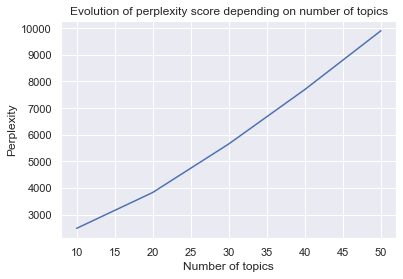

In [104]:
lda(vectorizer_X, X_tfidf_train, X_tfidf_test)

Le perplexity score le plus bas est obtenu avec 10 topics, Néanmoins, nous allons utilisé 20 topics (plus cohérant + coude du graphique)

In [105]:
best_lda = LatentDirichletAllocation(n_components=20, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)

In [106]:
def Recommend_tags_lda(text, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.
    Parameters:
    text: the stackoverflow post of user
    X_train: data to fit the model with
    '''

    text = clean_text(text)
    text = clean_punct(text)
    text = stopWordsRemove(text)
    text = lemitizeWords(text)
    n_topics = 10
    threshold = 0.010
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    vectorizer_text.fit(X_train)
    text_tfidf = vectorizer_text.transform([text])

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names_out()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

In [107]:
text = input('Ask a question: ')
tags = Recommend_tags_lda(text, X_lda_train)
print('Recommended tags are:', tags)

Recommended tags are: color image


In [108]:
def Recommend_tags_lda_test(X_tfidf_test, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    X_tfidf_test: the stackoverflow posts after TF-IDF transformation
    X_train: data to fit the model with
    '''

    df_tags_test_lda = pd.DataFrame(index=[i for i in range(X_tfidf_test.shape[0])], 
             columns=['0.010', '0.011', '0.012', '0.013'])
    corpus = X_tfidf_test
    n_topics = 10

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    X_tfidf_train = vectorizer_text.fit_transform(X_train)
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    corpus_projection = lda_model.transform(corpus)
    
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for column, threshold in zip(range(4), [0.010, 0.011, 0.012, 0.013]): #  threshold to exceed to be considered as a relevant tag

        for text in range(corpus.shape[0]):
            list_scores = []
            list_words = []

            for topic in range(n_topics):
                topic_score = corpus_projection[text][topic]

                for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                    score = topic_score*word_score

                    if score >= threshold:
                        list_scores.append(score)
                        list_words.append(feature_names[word_idx])

            results = [tag for (y,tag) in sorted(zip(list_scores,list_words), 
                                                 key=lambda pair: pair[0], reverse=True)]
            df_tags_test_lda.iloc[text, column] = results[:5] #maximum five tags

    return df_tags_test_lda

In [109]:
Recommend_tags_lda_test(X_tfidf_test, X_lda_train)

,0.010,0.011,0.012,0.013
0,[color],[],[],[]
1,[],[],[],[]
2,[image],[image],[image],[image]
3,[],[],[],[]
4,"[int, class]","[int, class]",[int],[]
...,...,...,...,...
5206,"[row, column, date, table]","[row, column, date, table]","[row, column, date, table]","[row, column, date, table]"
5207,"[div, html, javascript, page]","[div, html]","[div, html]","[div, html]"
5208,"[color, div, html]","[color, div, html]","[color, div, html]",[color]
5209,[],[],[],[]


## <font color = purple>3. ML Preparation</font>

### <font color = grey>3.1. Target binarize</font>

In [110]:
#Define y
y = df['Tags']

#Replace [, ], and '
y=y.str.replace("[","")
y=y.str.replace("]","")
y=y.str.replace("'","")

#Create list of list
y = y.str.split(', ')

#Binarize y
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

#Create a dataframe for vizualisation
df_ybin = pd.DataFrame(multilabel_binarizer.fit_transform(y),columns=multilabel_binarizer.classes_)
df_ybin.head(10)

,.net,ajax,algorithm,android,android-studio,angular,angularjs,apache,apache-spark,arrays,...,string,swift,ubuntu,unit-testing,unix,visual-studio,windows,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#Define y_sample
y_sample = df_sample['Tags']

#Replace [, ], and '
y_sample=y_sample.str.replace("[","")
y_sample=y_sample.str.replace("]","")
y_sample=y_sample.str.replace("'","")

#Create list of list
y_sample = y_sample.str.split(', ')

#Binarize y_sample
multilabel_binarizer = MultiLabelBinarizer()
y_sample_bin = multilabel_binarizer.fit_transform(y_sample)

#Create a dataframe for vizualisation
df_y_sample_bin = pd.DataFrame(multilabel_binarizer.fit_transform(y_sample),columns=multilabel_binarizer.classes_)
df_y_sample_bin.head(10)

,.net,ajax,algorithm,android,android-studio,angular,angularjs,apache,apache-spark,arrays,...,string,swift,ubuntu,unit-testing,unix,visual-studio,windows,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color = grey>3.2. Metrics</font>

In [114]:
def avg_jaccard(y_test, y_pred):
    score = jaccard_score(y_test, y_pred, average="micro")
    return score

In [115]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score micro: {}".format(jaccard_score(y_test, y_pred, average="micro")))
    print("Jacard score macro: {}".format(jaccard_score(y_test, y_pred, average="macro")))
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("---")

## <font color = purple>4. Modèles</font>

### <font color = grey>4.1 Split train / test (80/20)</font>

nous allons utiliser X_bow, X_bigram, X_tfidf, X_doc2vec et X_bert en entrée

In [116]:
#Split data in train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

### <font color = grey>4.2 OneVSRest</font>

In [117]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [118]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  SGDClassifier
Jacard score micro: 0.36592082616179
Jacard score macro: 0.27875632518484633
Accuracy: 0.204951065054692
---
Clf:  LogisticRegression
Jacard score micro: 0.3371745625266752
Jacard score macro: 0.25221232884698064
Accuracy: 0.17904432930339667
---
Clf:  MultinomialNB
Jacard score micro: 0.15230604218805863
Jacard score macro: 0.0710092070376939
Accuracy: 0.0756092880445212
---
Clf:  LinearSVC
Jacard score micro: 0.4072475570032573
Jacard score macro: 0.34634072219754214
Accuracy: 0.21800038380349263
---
Clf:  Perceptron
Jacard score micro: 0.3420879449596171
Jacard score macro: 0.2973122474915165
Accuracy: 0.1226252158894646
---
Clf:  PassiveAggressiveClassifier
Jacard score micro: 0.3834872734964394
Jacard score macro: 0.3389138901071926
Accuracy: 0.18326616772212628
---


### <font color = grey>4.3 OneVsRest for Word2Vec & Bert</font>

In [59]:
for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  SGDClassifier
Jacard score micro: 0.1696869851729819
Jacard score macro: 0.08360183145924834
Accuracy: 0.04
---
Clf:  LogisticRegression
Jacard score micro: 0.1310344827586207
Jacard score macro: 0.05739313464313464
Accuracy: 0.03
---
Clf:  LinearSVC
Jacard score micro: 0.19272727272727272
Jacard score macro: 0.14252986409134322
Accuracy: 0.07
---
Clf:  Perceptron
Jacard score micro: 0.15920398009950248
Jacard score macro: 0.10721336722233614
Accuracy: 0.035
---
Clf:  PassiveAggressiveClassifier
Jacard score micro: 0.1894353369763206
Jacard score macro: 0.12882588458683578
Accuracy: 0.085
---


### <font color = grey>4.4 MLP Classifier</font>

In [60]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score micro: 0.1399548532731377
Jacard score macro: 0.05804265505610176
Accuracy: 0.04
---


### <font color = grey>4.5 Random Forest Classifier</font>

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---


## <font color = purple>5. Tunning</font>

In [119]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [120]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jaccard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ...............estimator__C=1;, score=0.412 total time=   3.5s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ...............estimator__C=1;, score=0.409 total time=   3.4s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ...............estimator__C=1;, score=0.411 total time=   3.4s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ...............estimator__C=1;, score=0.411 total time=   3.6s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ...............estimator__C=1;, score=0.395 total time=   3.2s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END ..............estimator__C=10;,

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jaccard), verbose=10)

In [121]:
CV_svc.best_params_

{'estimator__C': 1}

In [122]:
best_model = CV_svc.best_estimator_

In [123]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score micro: 0.4072475570032573
Jacard score macro: 0.34634072219754214
Accuracy: 0.21800038380349263
---


CONFUSION MATRIX

In [124]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

.net
[[4876   36]
 [ 215   84]]

ajax
[[5134    9]
 [  37   31]]

algorithm
[[5106   14]
 [  60   31]]

android
[[4779   21]
 [ 104  307]]

android-studio
[[5168    7]
 [  13   23]]

angular
[[5177    6]
 [  13   15]]

angularjs
[[5153    1]
 [  50    7]]

apache
[[5172    5]
 [  23   11]]

apache-spark
[[5171    2]
 [   9   29]]

arrays
[[5127   21]
 [  35   28]]

asp.net
[[5069   18]
 [  97   27]]

asp.net-mvc
[[5097   15]
 [  62   37]]

assembly
[[5172    4]
 [  19   16]]

asynchronous
[[5168    8]
 [  24   11]]

authentication
[[5164   12]
 [  28    7]]

bash
[[5122   11]
 [  43   35]]

c
[[4979   36]
 [ 141   55]]

c#
[[4603   78]
 [ 242  288]]

c++
[[4778   38]
 [ 138  257]]

c++11
[[5106   15]
 [  55   35]]

class
[[5169    7]
 [  32    3]]

cocoa
[[5170    2]
 [  39    0]]

cocoa-touch
[[5090    4]
 [ 117    0]]

css
[[5035   26]
 [  54   96]]

database
[[5101   14]
 [  79   17]]

dataframe
[[5134   20]
 [  27   30]]

date
[[5161    7]
 [  28   15]]

datetime
[[5163    9]
 [  2

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [125]:
cf_matrix = confusion_matrix(y_test[:,0], y_pred[:,0])

<AxesSubplot:>

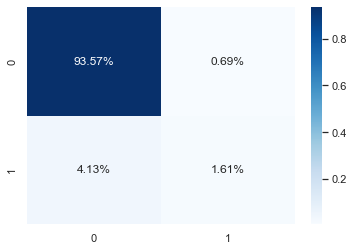

In [126]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

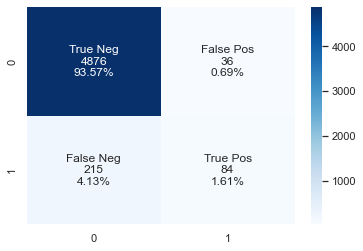

In [127]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

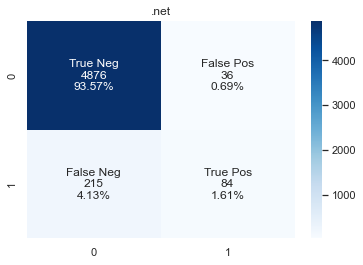

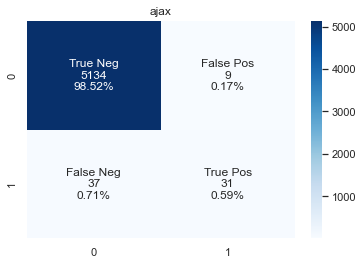

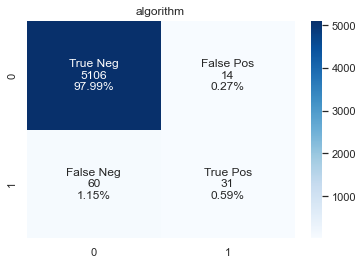

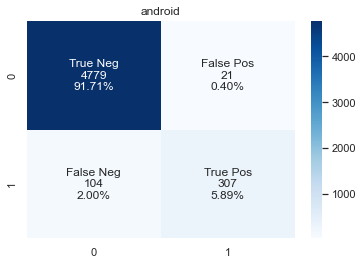

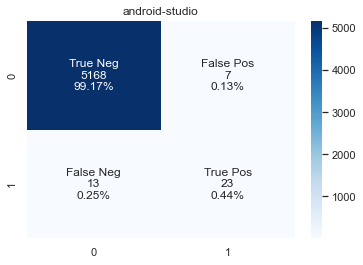

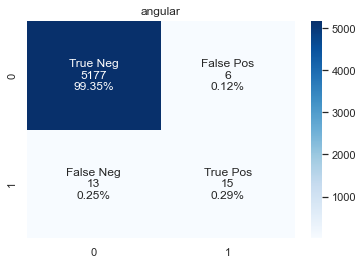

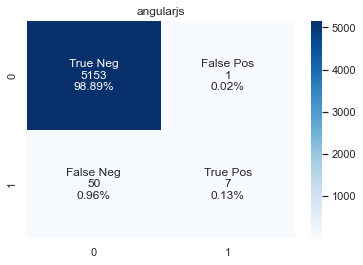

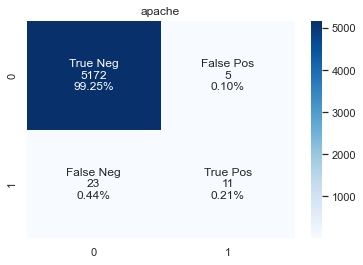

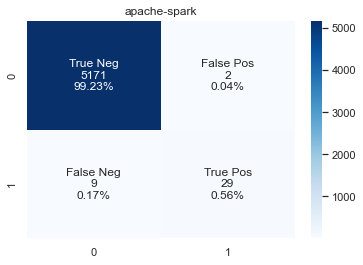

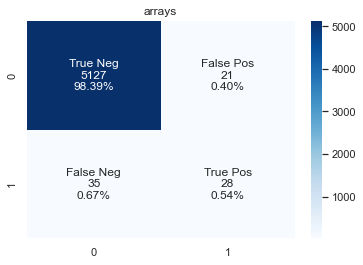

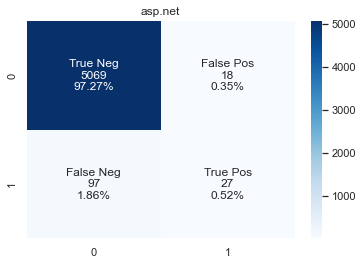

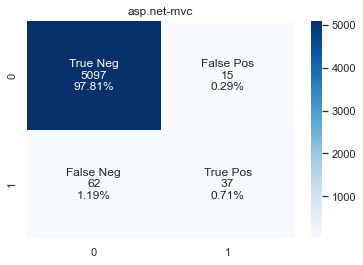

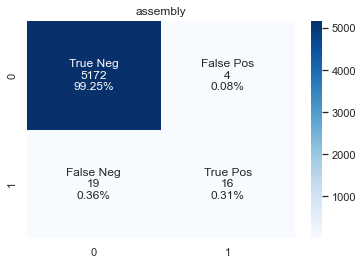

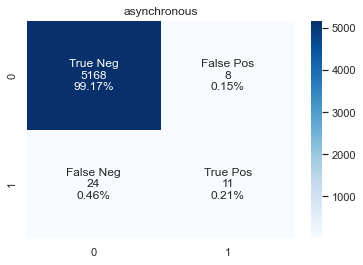

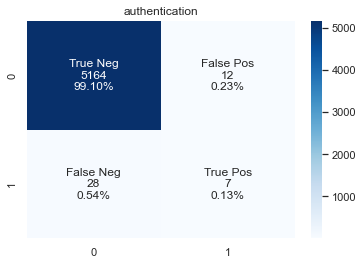

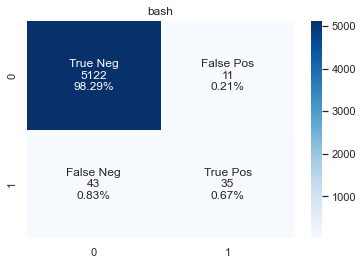

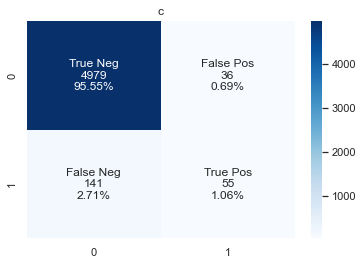

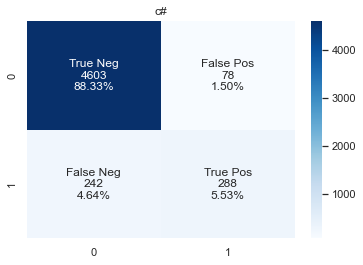

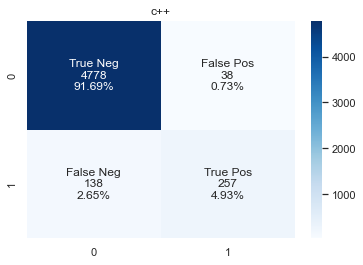

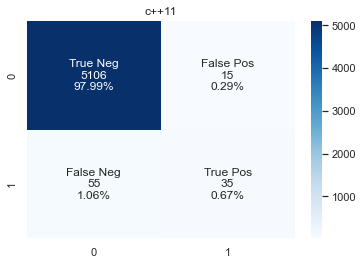

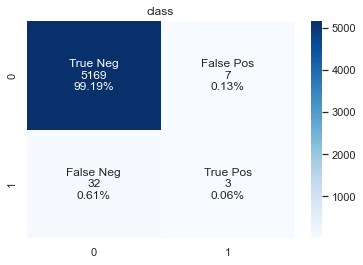

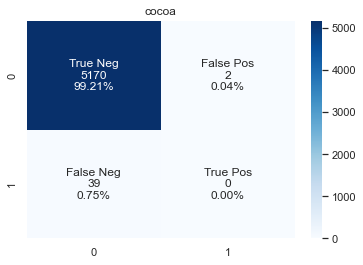

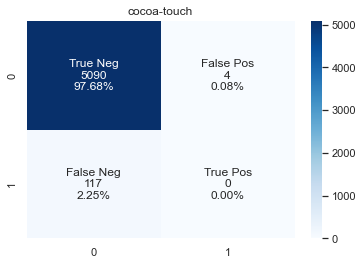

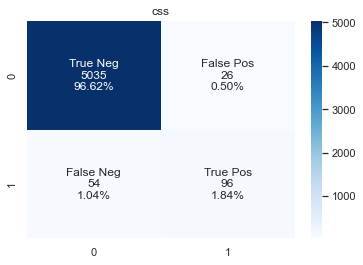

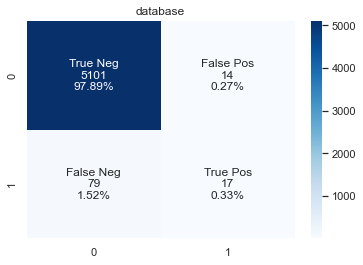

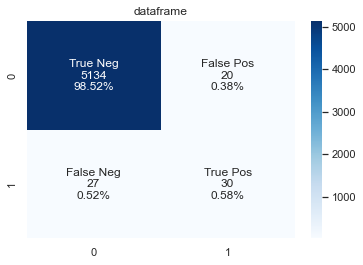

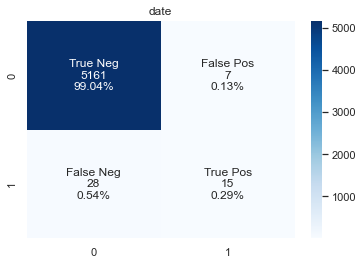

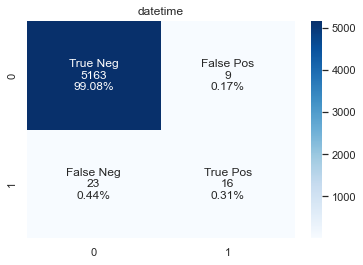

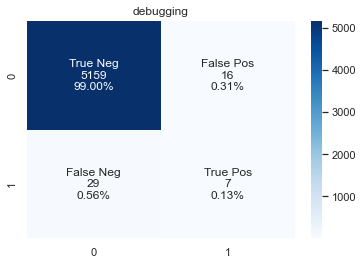

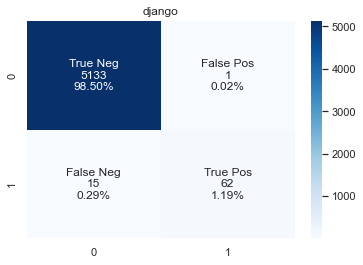

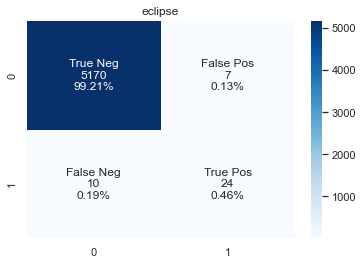

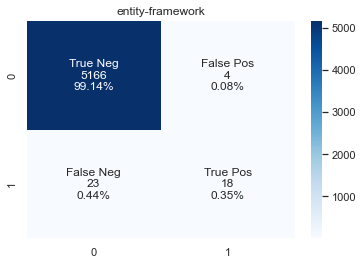

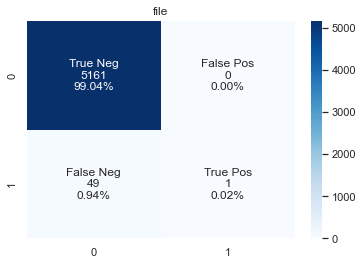

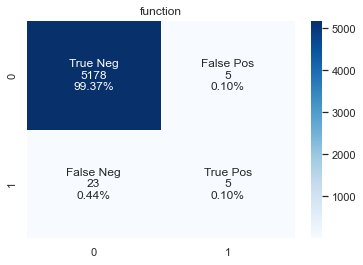

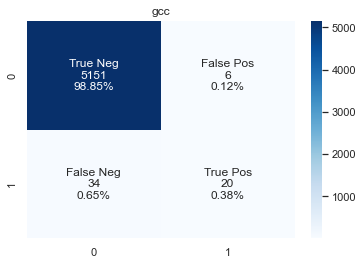

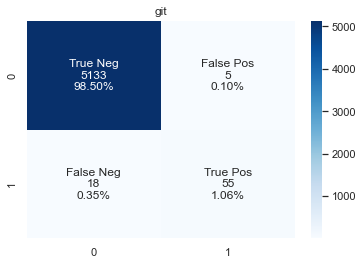

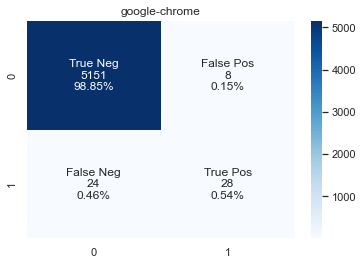

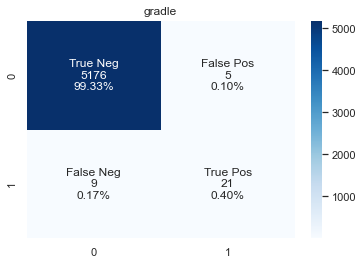

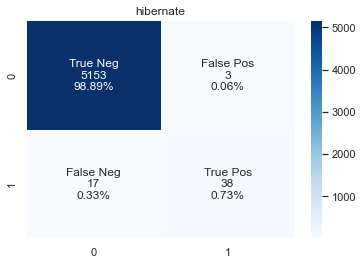

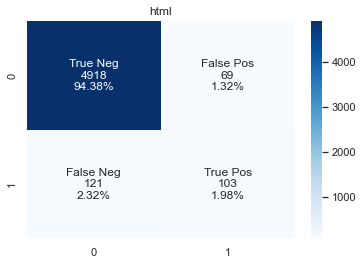

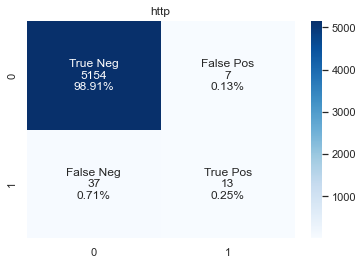

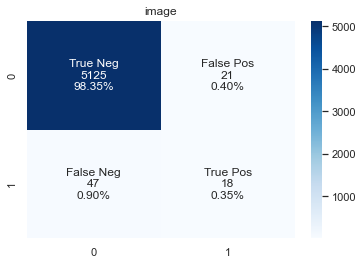

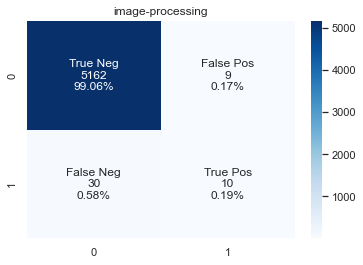

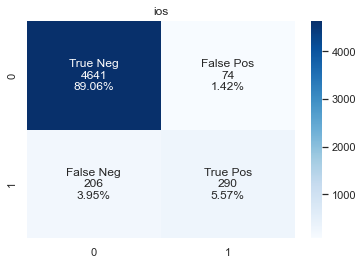

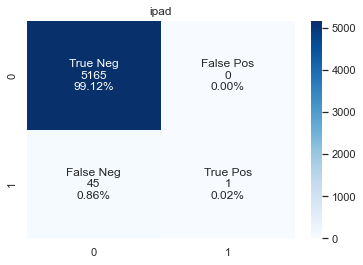

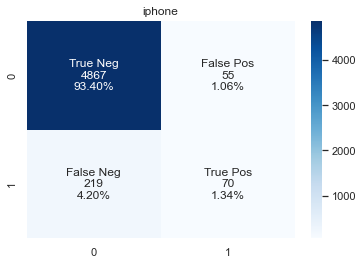

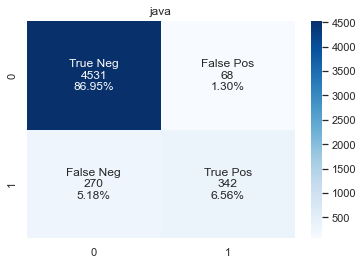

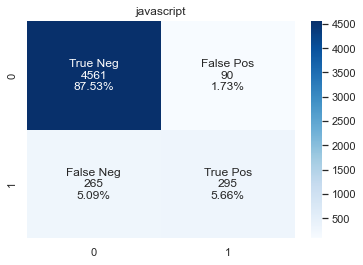

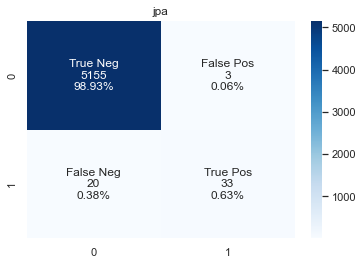

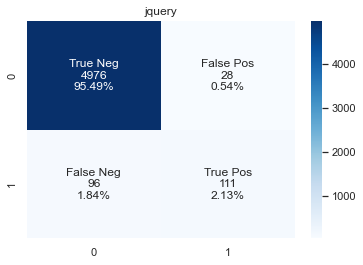

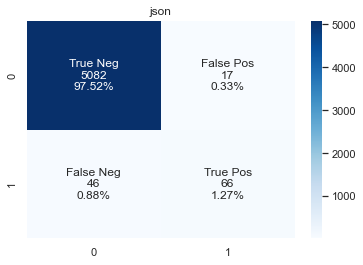

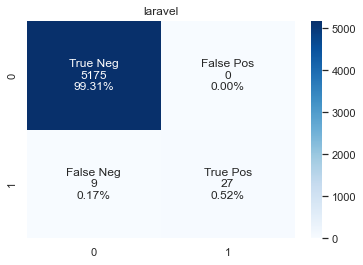

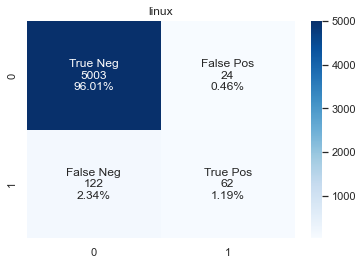

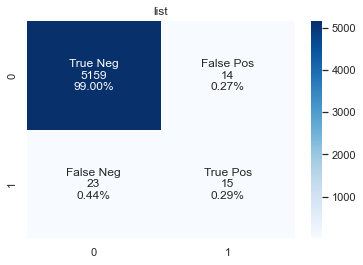

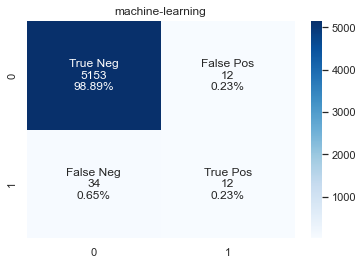

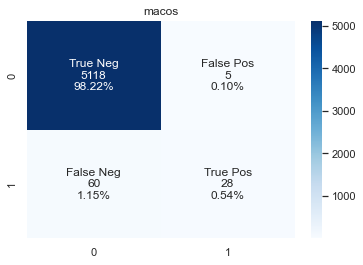

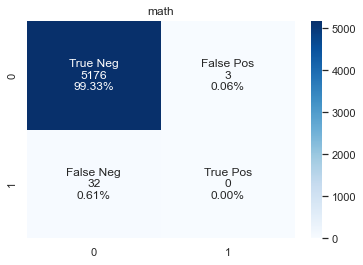

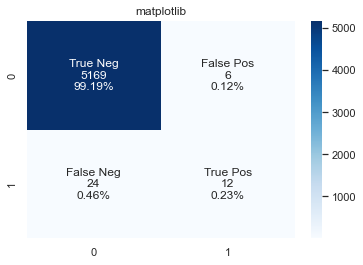

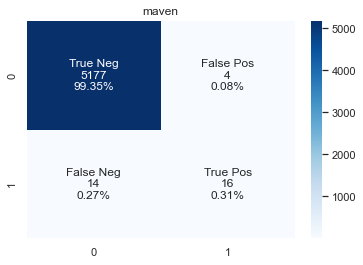

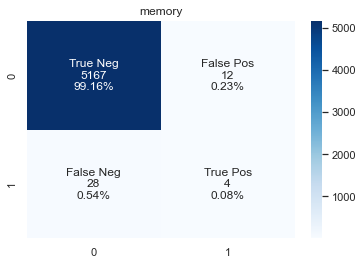

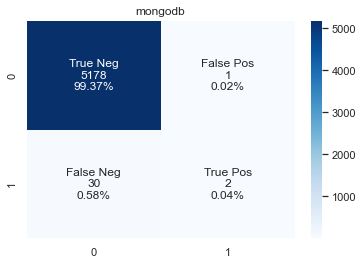

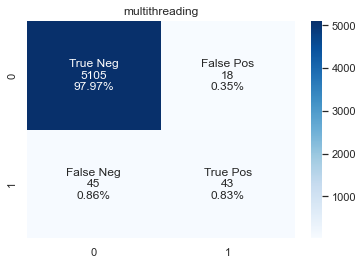

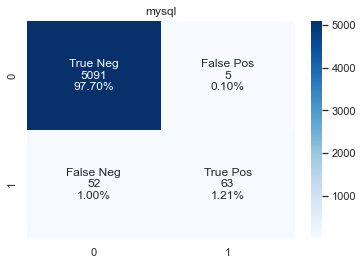

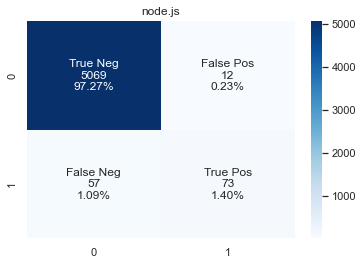

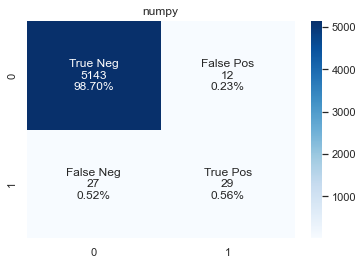

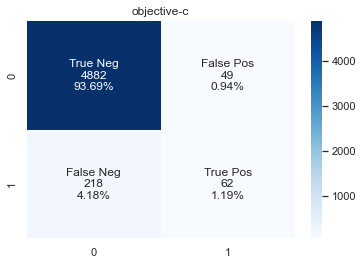

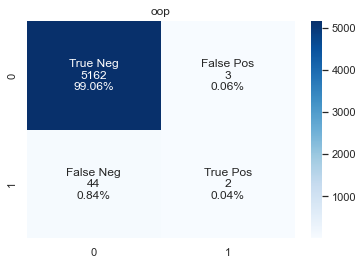

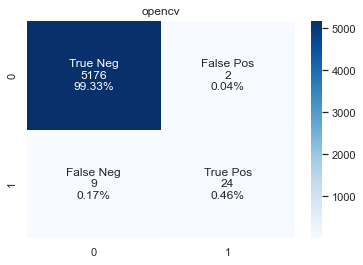

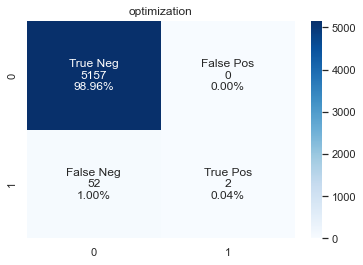

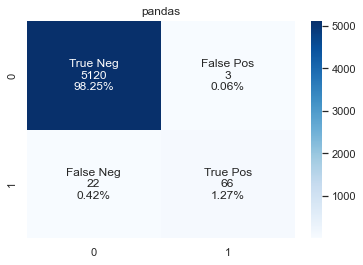

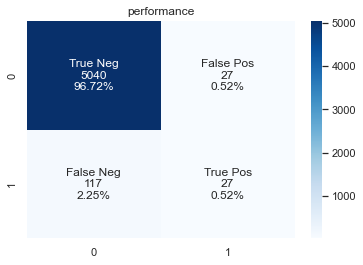

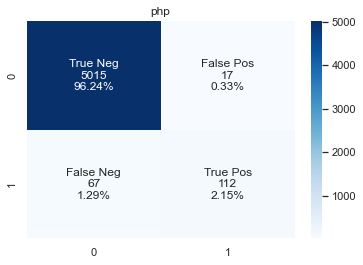

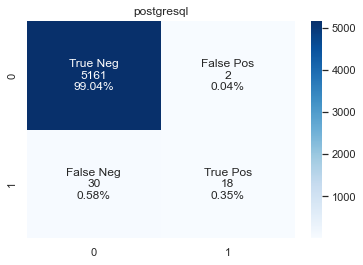

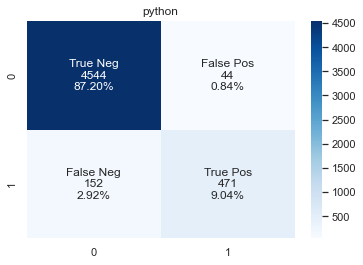

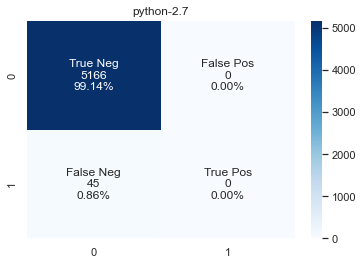

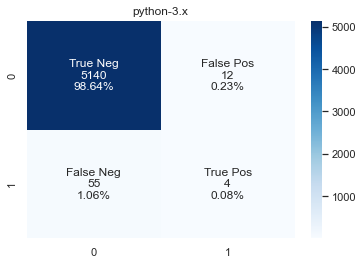

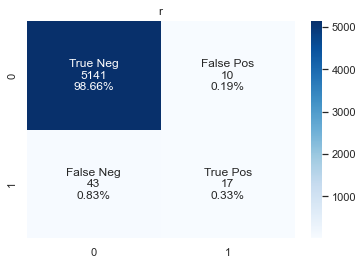

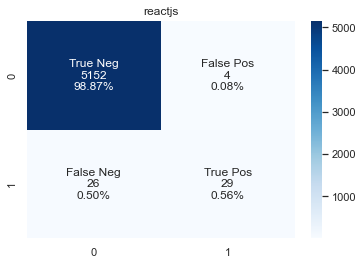

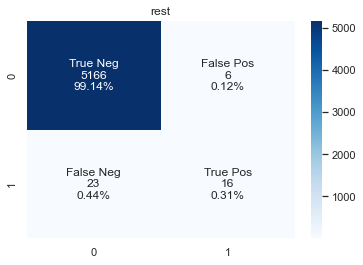

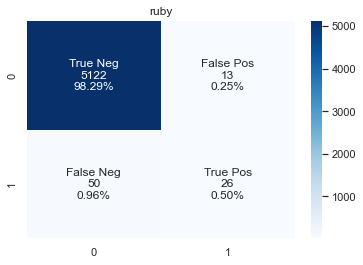

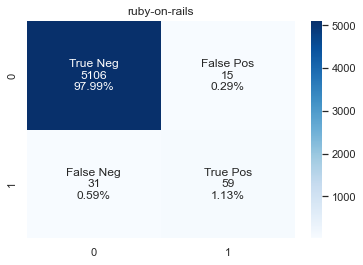

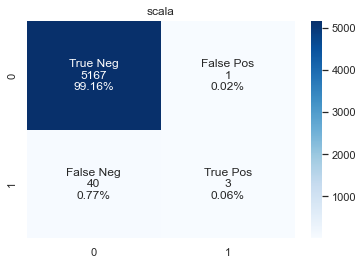

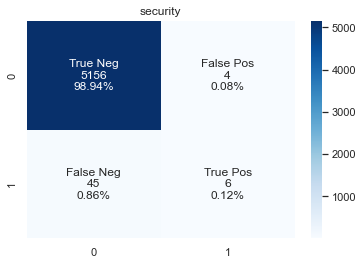

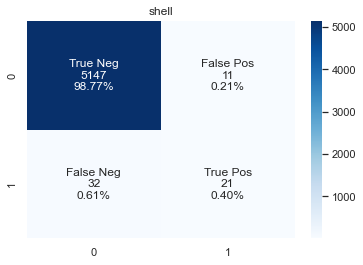

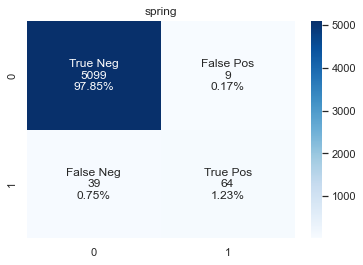

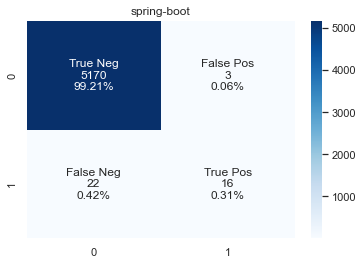

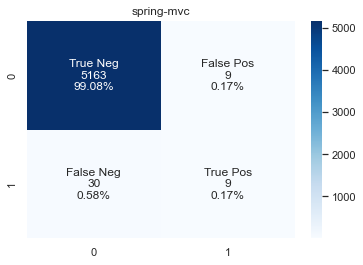

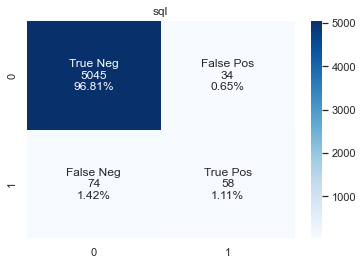

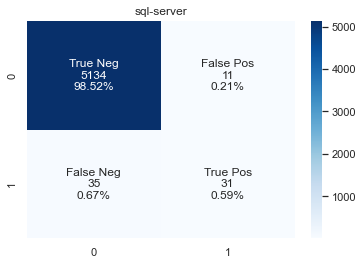

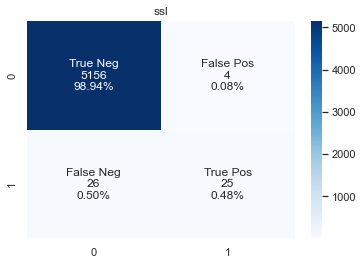

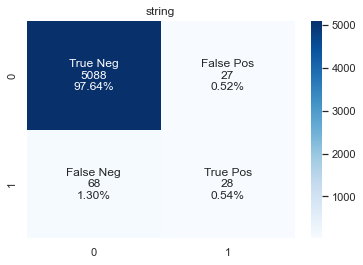

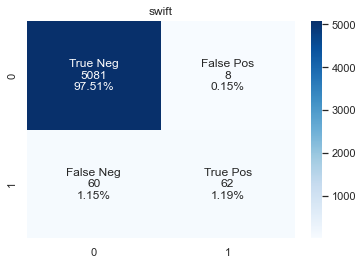

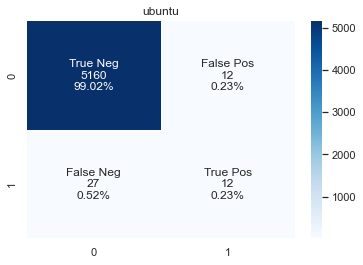

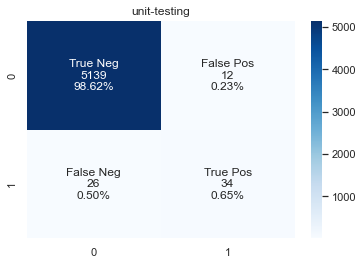

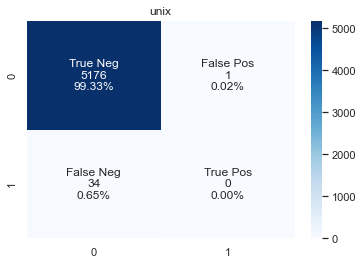

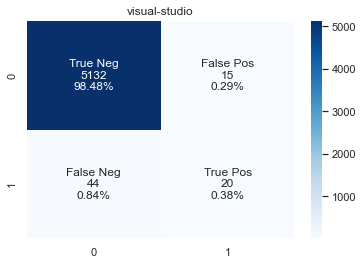

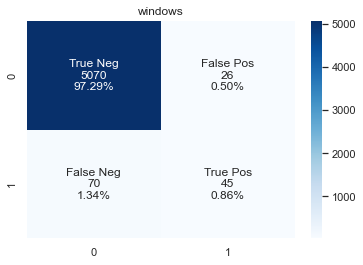

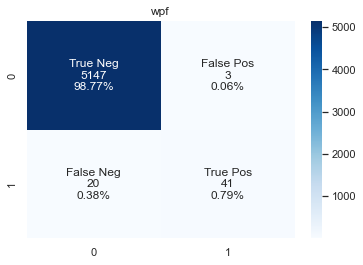

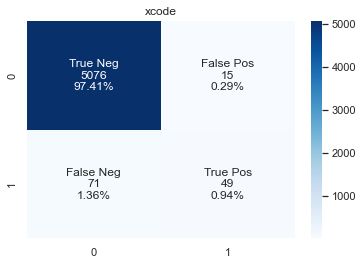

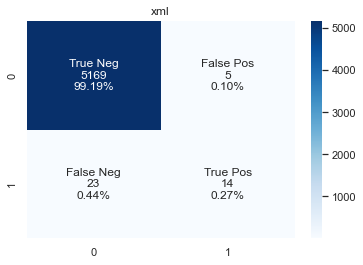

In [129]:
for i in range(y_train.shape[1]):
    cf_matrix = confusion_matrix(y_test[:,i], y_pred[:,i])
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(i)
    plt.title(multilabel_binarizer.classes_[i])
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print("")

FEATURES IMPORTANCE

SUGGESSTION D'UN TAG POUR TESTER